In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score, precision_score
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from xgboost import XGBRegressor  # XGBoost for regression
from xgboost import XGBClassifier  # XGBoost for classification
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout 
from keras.layers import LSTM  #Neural network

In [ ]:
#pip! install xgboost  #If xgboost not present

In [20]:
#Loading data into DataFrame
dd = pd.read_csv('all_commodities_data.csv')

In [21]:
#Data overview and info
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28826 entries, 0 to 28825
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     28826 non-null  object 
 1   commodity  28826 non-null  object 
 2   date       28826 non-null  object 
 3   open       28826 non-null  float64
 4   high       28826 non-null  float64
 5   low        28826 non-null  float64
 6   close      28826 non-null  float64
 7   volume     28826 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.8+ MB


In [22]:


# Filter the DataFrame to include only rows where the 'commodity' column contains 'Gold'
df = dd[dd['commodity'] == 'Gold']

In [23]:
df.head()

,ticker,commodity,date,open,high,low,close,volume
0,GC=F,Gold,2000-08-30,273.899994,273.899994,273.899994,273.899994,0
1,GC=F,Gold,2000-08-31,274.799988,278.299988,274.799988,278.299988,0
2,GC=F,Gold,2000-09-01,277.000000,277.000000,277.000000,277.000000,0
3,GC=F,Gold,2000-09-05,275.799988,275.799988,275.799988,275.799988,2
4,GC=F,Gold,2000-09-06,274.200012,274.200012,274.200012,274.200012,0


In [24]:
#Data preparation - dropping features we won't use
df.drop(['ticker', 'commodity', 'volume'], axis=1, inplace=True)

/tmp/ipykernel_163/83537212.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
df.head()

,date,open,high,low,close
0,2000-08-30,273.899994,273.899994,273.899994,273.899994
1,2000-08-31,274.799988,278.299988,274.799988,278.299988
2,2000-09-01,277.000000,277.000000,277.000000,277.000000
3,2000-09-05,275.799988,275.799988,275.799988,275.799988
4,2000-09-06,274.200012,274.200012,274.200012,274.200012


In [26]:
#Changing data type into datetime
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

/tmp/ipykernel_163/3633571883.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_163/3633571883.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
NumCols = df.columns.drop(['date'])
df[NumCols] = df[NumCols].replace({',': ''}, regex=True)
df[NumCols] = df[NumCols].astype('float64')


/tmp/ipykernel_163/3118129596.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_163/3118129596.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
#Creating 'price' column to average the prices from every day

df['price'] = df[['high', 'low', 'open', 'close']].mean(axis=1)

/tmp/ipykernel_163/1886403750.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
#Results of transformation
df.head()

,date,open,high,low,close,price
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,276.549988
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012


In [29]:
#Check for duplicates 

df.duplicated().sum()




0

In [30]:
# and for missing values

df.isnull().sum().sum()

0

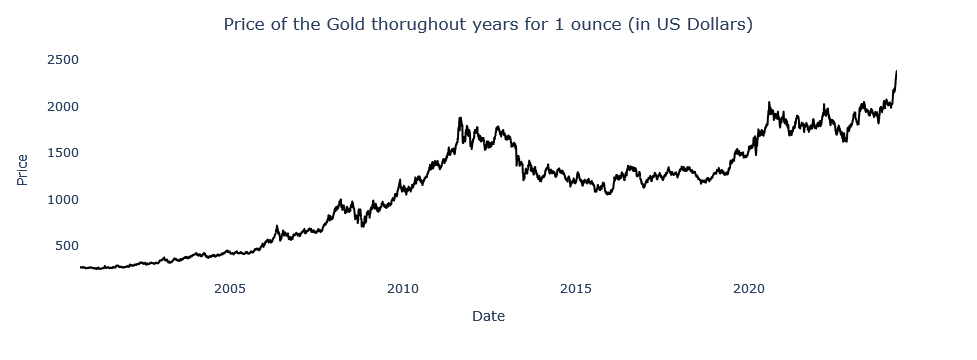

In [40]:
#Visualization

fig = px.line(y=df.price, x=df.date)
fig.update_traces(line_color='black')
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Price",
    title={'text': "Price of the Gold thorughout years for 1 ounce (in US Dollars)", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
    plot_bgcolor='white' 
)


In [44]:
#Splitting data into train and test samples
test_size = df[df.date.dt.year==2023].shape[0]
test_size


251

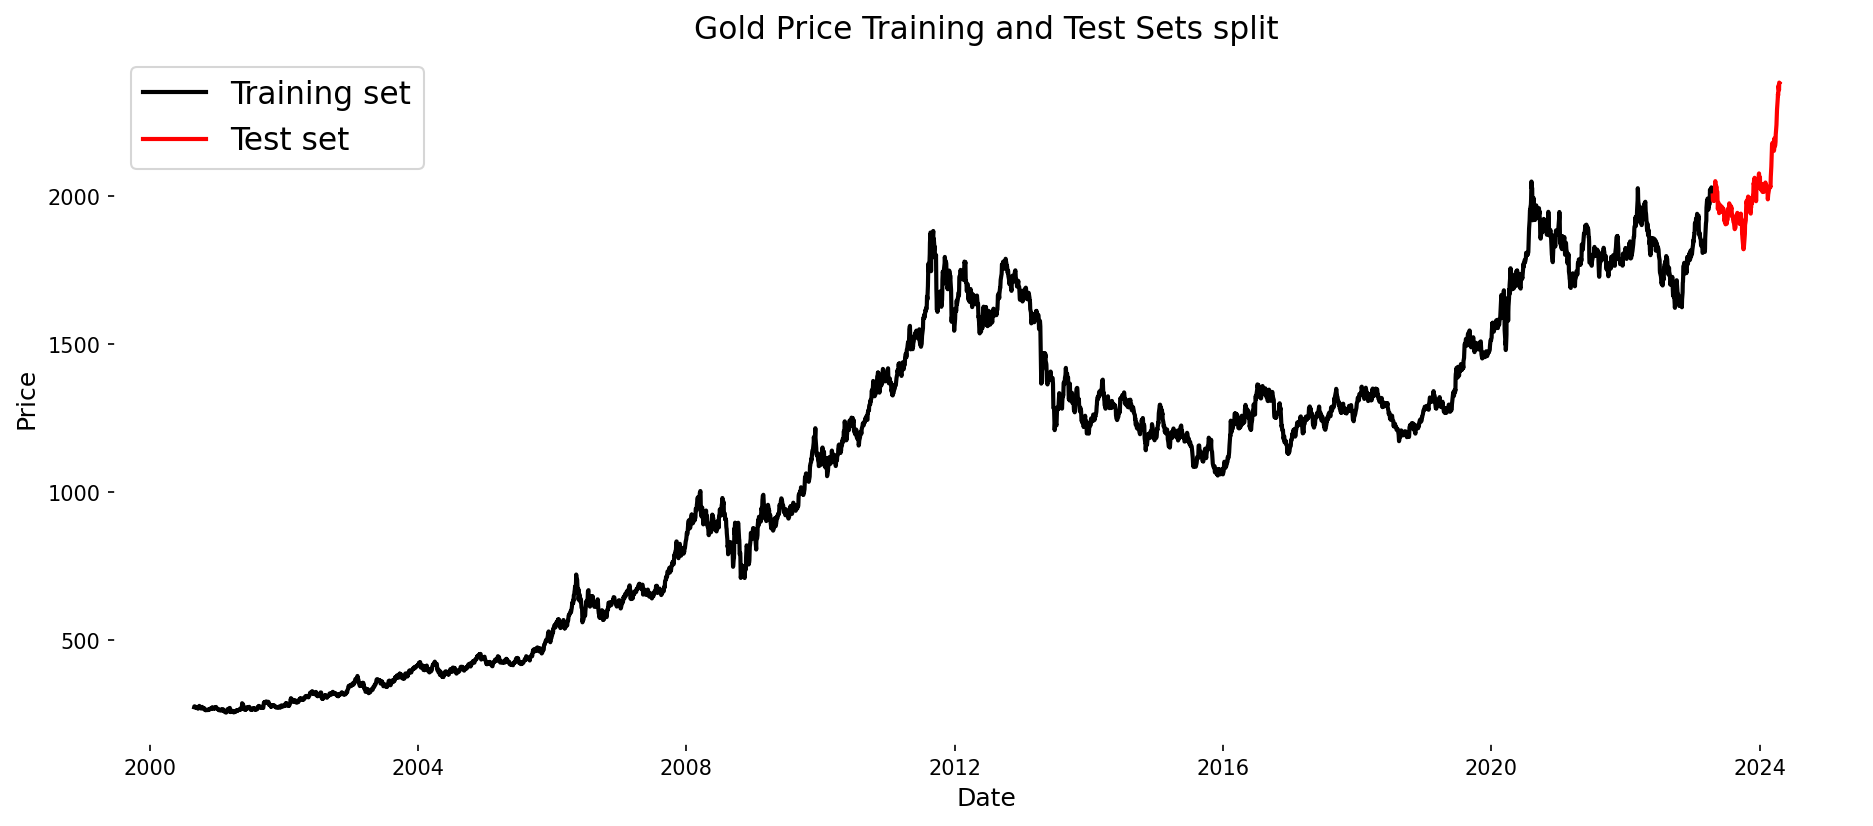

In [47]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df.date[:-test_size], df.price[:-test_size], color='black', lw=2)
plt.plot(df.date[-test_size:], df.price[-test_size:], color='red', lw=2)
plt.title('Gold Price Training and Test Sets split', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [49]:
#Data scaling

scaler = MinMaxScaler()
scaler.fit(df.price.values.reshape(-1,1))

MinMaxScaler()

In [50]:
#Data shaping

window_size = 60

In [51]:
#Training set
train_data = df.price[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [53]:
#Test set


test_data = df.price[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [62]:
#Converting to arrays
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)



X_train Shape:  (5618, 60, 1)
y_train Shape:  (5618, 1)
X_test Shape:   (251, 60, 1)
y_test Shape:   (251, 1)


In [63]:
#Model defining attempt

def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64, return_sequences=True)(input1)  
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()
    
    return model

In [64]:
#Training


model = define_model()
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)



2024-04-27 23:31:48.488807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-27 23:31:48.490987: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-27 23:31:48.492597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0     

2024-04-27 23:31:48.861507: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-27 23:31:48.863454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-27 23:31:48.864389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

158/158 [==============================] - ETA: 0s - loss: 0.0201

2024-04-27 23:32:02.009149: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-27 23:32:02.010865: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-27 23:32:02.012190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

158/158 [==============================] - 14s 63ms/step - loss: 0.0201 - val_loss: 0.0356
Epoch 2/150
158/158 [==============================] - 11s 67ms/step - loss: 0.0024 - val_loss: 0.0123
Epoch 3/150
158/158 [==============================] - 10s 65ms/step - loss: 0.0011 - val_loss: 0.0053
Epoch 4/150
158/158 [==============================] - 12s 76ms/step - loss: 8.0449e-04 - val_loss: 0.0029
Epoch 5/150
158/158 [==============================] - 13s 84ms/step - loss: 6.4722e-04 - val_loss: 0.0018
Epoch 6/150
158/158 [==============================] - 12s 79ms/step - loss: 5.8345e-04 - val_loss: 0.0014
Epoch 7/150
158/158 [==============================] - 13s 83ms/step - loss: 5.4224e-04 - val_loss: 0.0010
Epoch 8/150
158/158 [==============================] - 13s 85ms/step - loss: 4.8134e-04 - val_loss: 9.1952e-04
Epoch 9/150
158/158 [==============================] - 13s 81ms/step - loss: 4.3877e-04 - val_loss: 9.5729e-04
Epoch 10/150
158/158 [==============================]

In [65]:
#Evaluation

result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test) 

8/8 [==============================] - 0s 19ms/step - loss: 0.0026


2024-04-28 00:02:50.534042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-28 00:02:50.536099: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-28 00:02:50.537367: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 1s 19ms/step


In [66]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

In [67]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.002624394139274955
Test MAPE: 0.03767988521764622
Test Accuracy: 0.9623201147823538


In [68]:
#Visualization

y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

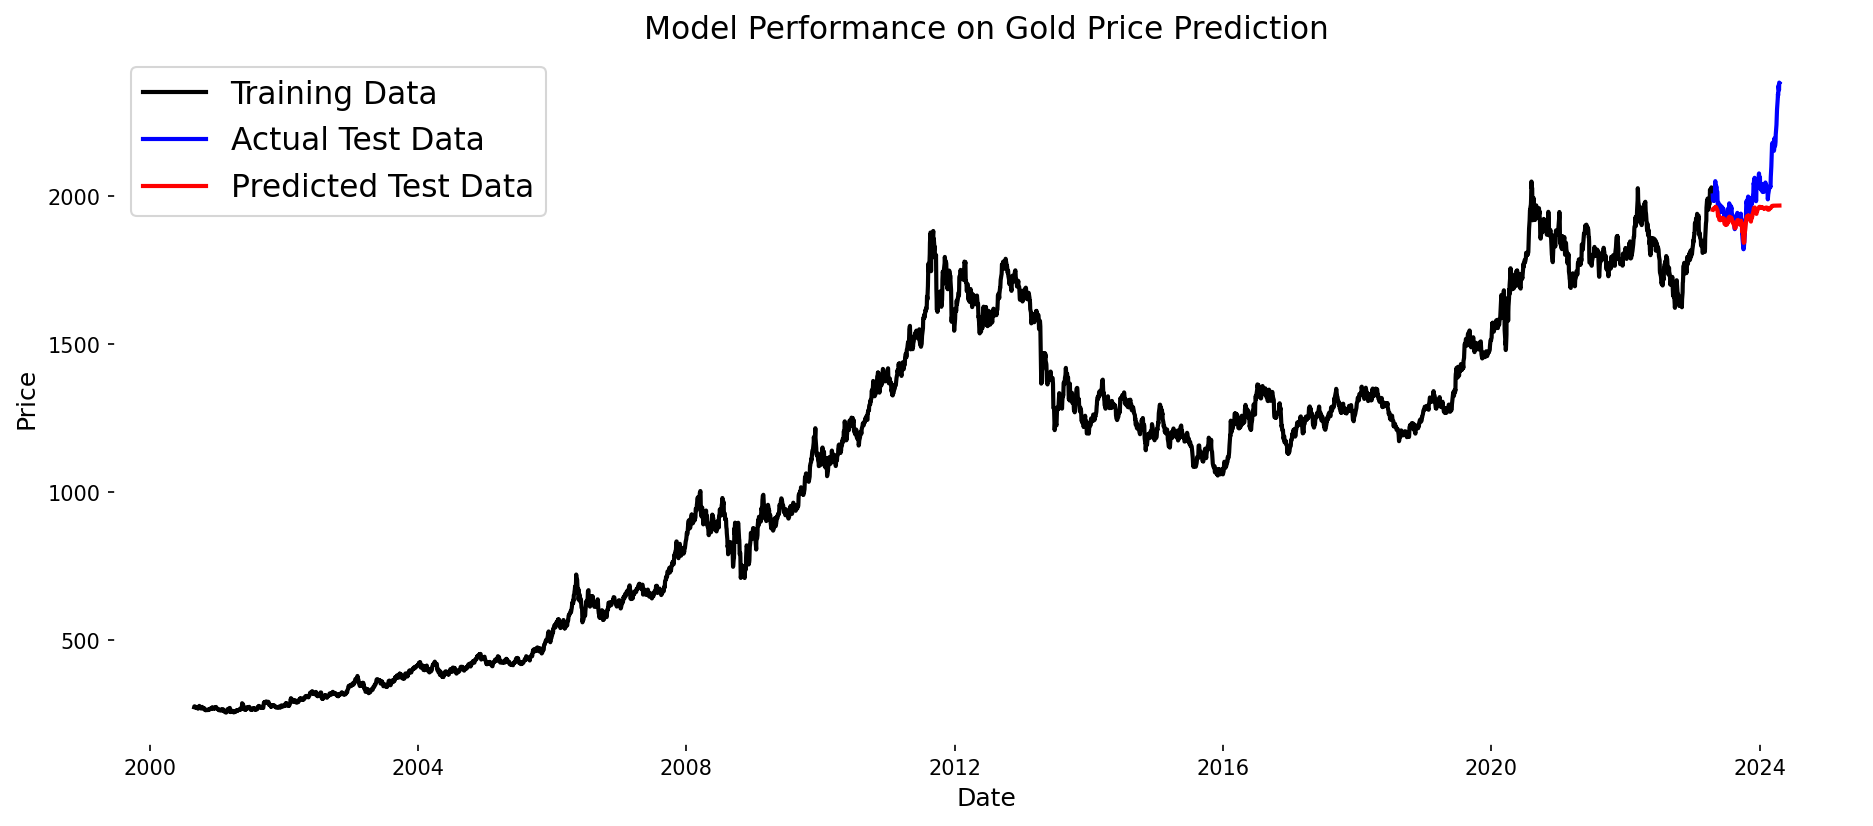

In [70]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on Gold Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()